In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [24]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

In [25]:
print(f"X_train.shape={X_train.shape},y_train={y_train.shape}")
print(f"y_train={y_train}")

X_train.shape=(100, 2),y_train=(100,)
y_train=[3 3 3 0 3 3 3 3 2 0 2 1 1 1 0 3 2 3 1 2 3 0 1 2 2 0 3 1 0 0 3 0 3 2 3 1 1
 2 3 0 0 2 3 0 3 1 1 3 3 0 0 2 0 2 2 0 0 3 3 2 0 0 0 1 2 1 1 1 3 1 1 2 3 0
 1 2 2 0 1 1 2 2 2 1 1 0 1 0 2 3 3 0 2 1 2 1 1 2 2 0]


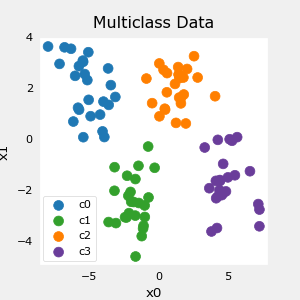

In [26]:
plt_mc(X_train,y_train,classes,centers,std=std)

In [27]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")


unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


In [28]:
tf.random.set_seed(1234)
model=Sequential([
    Dense(2,activation='relu',name='L1'),
    Dense(4,activation='linear',name='L2')
])


In [29]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(0.01)
)
model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 3.3968
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 2.9933
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 2.7036
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 2.3481
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 2.0940
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 1.8585
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 1.6448
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 1.4767
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 1.3289
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2260
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 1.1303
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0570
Epoch 13/200
4/4 [==============================] - 0s 2ms/st

184/184 [==============================] - 0s 992us/step


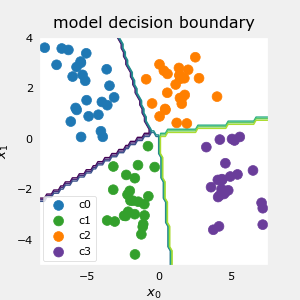

In [30]:
plt_cat_mc(X_train,y_train,model,classes)